<a href="https://colab.research.google.com/github/PinakDivecha/SmartHealthPublicCode/blob/master/Smart_Health_Public_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split   
import numpy as np  
import re
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from math import sqrt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
root_path = "/content/drive/My Drive/Smart Health/Assignment_2/"
all_files = os.listdir(root_path)

In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Smart Health/Assignment_2/data0.csv")

In [6]:
main_x_list = []
main_y_list = []
for entry in all_files:
  each_file_path = root_path + entry
  df = pd.read_csv(each_file_path)
  column_name = df.columns[0]
  df[column_name] = df[column_name].str.strip('[ ]')
  main_y_list.append(int(re.search(r'\d+', column_name).group()))
  tt_list = []
  for i in range(len(df[column_name])):
    tmp_line = df[column_name].iloc[i]
    each_line = tmp_line.split()
    for j in each_line:
      tt_list.append(int(j))
    
  main_x_list.append(tt_list)

In [7]:
main_x_array = np.array(main_x_list)
main_y_array = np.array(main_y_list)

print("Dimension of X ",main_x_array.shape," and Dimention of Y ",main_y_array.shape)

Dimension of X  (1000, 2500)  and Dimention of Y  (1000,)


In [8]:
mm_scaler = preprocessing.MinMaxScaler()
main_x_minmax = mm_scaler.fit_transform(main_x_array)


X_train, X_test, Y_train, Y_test = train_test_split(main_x_minmax, main_y_array, test_size=0.3, random_state=42)

kf = KFold(n_splits=5)

In [9]:
activationFunction='relu'
def getModelANN():
    model = Sequential()
    model.add(Dense(100, input_dim = X_train.shape[1], activation=activationFunction))
    model.add(Dense(75, activation=activationFunction))
    model.add(Dense(50, activation=activationFunction))
    model.add(Dense(25, activation=activationFunction))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='RMSprop')
    return model

modelANN = getModelANN()

In [10]:
def showResults(test, pred):
        mse=mean_squared_error(test, pred)
        rmse = sqrt(mse)
        print("RMSE: ", rmse)

In [11]:
verbose, epochs, batch_size = 1, 1, 1

In [12]:
for train_index, test_index in kf.split(X_train):
  x_train, x_val = X_train[train_index], X_train[test_index]
  y_train, y_val = Y_train[train_index], Y_train[test_index]
  history = modelANN.fit(x_train, y_train, 
                      validation_data = (x_val, y_val),                      
                      batch_size = batch_size, 
                      epochs = epochs)

# Saving model to drive
# modelANN.save('/content/drive/My Drive/Smart Health/1101608-ANN.h5') 

560/560 [==============================] - 1s 3ms/step - loss: 7919.4839 - val_loss: 4158.2617


In [13]:
# Loading model from drive and using it on test case

# saved_model = tf.keras.models.load_model('/content/drive/My Drive/Smart Health/1101608-ANN.h5')
yPredict = modelANN.predict(X_test)
showResults(Y_test, yPredict)

RMSE:  84.911153656816


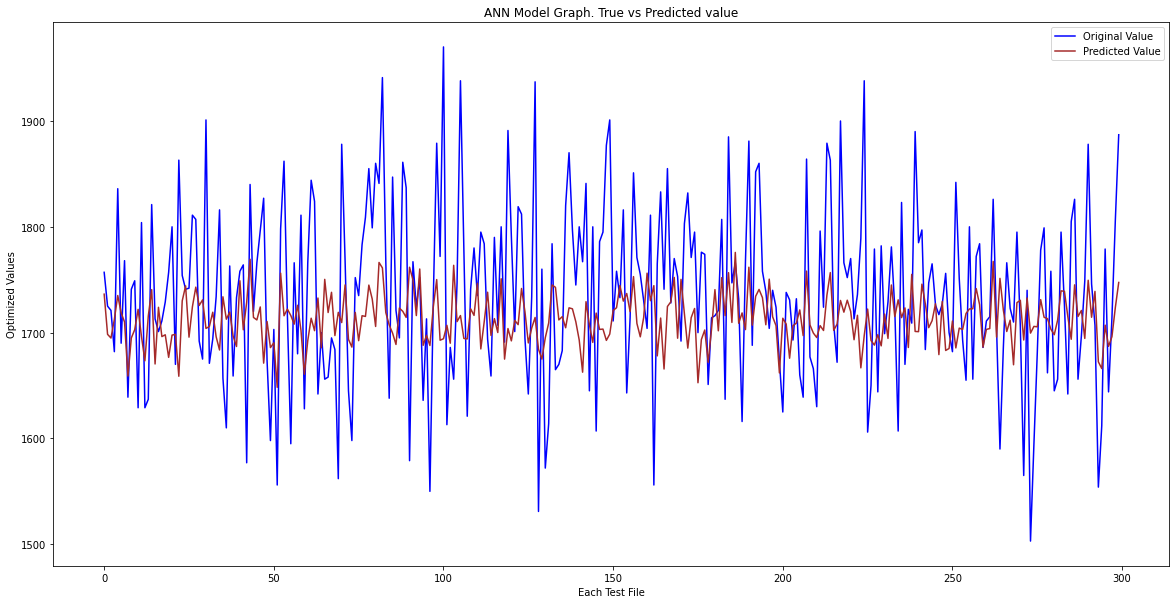

In [14]:
# Importing library for visualizaion
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.plot(Y_test,color='blue', label='Original Value')
plt.plot(yPredict, color='brown', label='Predicted Value')
plt.legend()
plt.title('ANN Model Graph. True vs Predicted value')
plt.ylabel("Optimized Values")
plt.xlabel("Each Test File")
plt.show()

In [15]:
# Importing necessary libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
from keras.utils import to_categorical

Using TensorFlow backend.


In [16]:
def getModelCNN():
    model = Sequential()
    
    model.add(Conv1D(100, kernel_size = 5, 
                     activation = activationFunction, 
                     input_shape = (2500, 1)))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Conv1D(50, 
                     kernel_size=3, 
                     activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Conv1D(50, 
                     kernel_size=3, 
                     activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Flatten())
    model.add(Dense(100, 
                    activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(Dense(50, 
                    activation=activationFunction))
    
    model.add(Dense(1, activation = 'linear'))
    model.compile(optimizer='RMSprop', loss='mean_squared_error')
    
    return model

modelCNN = getModelCNN()

In [17]:
# Initializing variables.
cnn_epoch = 50
cnn_batch_size = 64

In [18]:
# Expanding array for out model
X_train_expand = np.expand_dims(X_train, axis=2)
X_test_expand = np.expand_dims(X_test, axis=2)

In [19]:
# Printing the shape of X_train after expanding.
X_train_expand.shape

(700, 2500, 1)

In [20]:
# Training Model usng 5 fold cross validation.
for train_index, test_index in kf.split(X_train_expand):
  x_train, x_val = X_train_expand[train_index], X_train_expand[test_index]
  y_train, y_val = Y_train[train_index], Y_train[test_index]

  history = modelCNN.fit(x_train, y_train, 
                      validation_data = (x_val, y_val), 
                      epochs = cnn_epoch)

# Saving the model to drive.
# modelCNN.save('/content/drive/My Drive/Smart Health/1101608_CNN.h5') 

Train on 560 samples, validate on 140 samples
Epoch 1/50
560/560 [==============================] - 6s 11ms/step - loss: 739559.0675 - val_loss: 6806.0925
Epoch 2/50
560/560 [==============================] - 1s 945us/step - loss: 76894.1040 - val_loss: 33752.1603
Epoch 3/50
560/560 [==============================] - 1s 924us/step - loss: 73857.4740 - val_loss: 8851.2777
Epoch 4/50
560/560 [==============================] - 1s 916us/step - loss: 58528.0254 - val_loss: 52766.8799
Epoch 5/50
560/560 [==============================] - 1s 919us/step - loss: 79135.6676 - val_loss: 31595.0259
Epoch 6/50
560/560 [==============================] - 1s 943us/step - loss: 58815.1180 - val_loss: 8718.8795
Epoch 7/50
560/560 [==============================] - 1s 916us/step - loss: 53585.8863 - val_loss: 30264.5884
Epoch 8/50
560/560 [==============================] - 1s 923us/step - loss: 64049.7183 - val_loss: 8027.0566
Epoch 9/50
560/560 [==============================] - 1s 916us/step - loss: 53

In [21]:
# Loading the saved model.
# saved_model_CNN = tf.keras.models.load_model('/content/drive/My Drive/Smart Health/1101608_CNN.h5')

# Pridicting the value
yPredict_CNN = modelCNN.predict(X_test_expand)

# flattering the array
yPredict_CNN = yPredict_CNN.flatten()

yPredict_CNN = yPredict_CNN.astype(int)

# Calculating the root mean square error.
showResults(Y_test, yPredict_CNN)

RMSE:  121.36839237077612


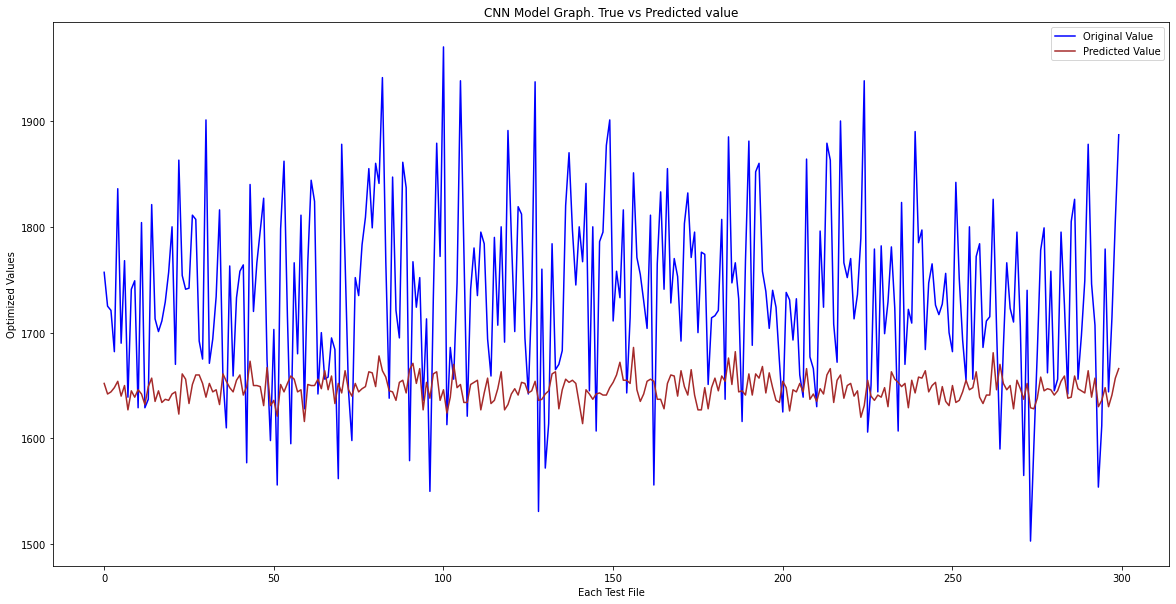

In [22]:
# Displaying graph for CNN model
plt.figure(figsize = (20,10))
plt.plot(Y_test,color='blue', label='Original Value')
plt.plot(yPredict_CNN, color='brown', label='Predicted Value')
plt.legend()
plt.title('CNN Model Graph. True vs Predicted value')

plt.ylabel("Optimized Values")
plt.xlabel("Each Test File")
plt.show()